In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input

In [26]:
df = pd.read_excel("gdprussia.xlsx")
df

,year,oilprice,gdp
0,2018,71.06,1657.554647
1,2017,54.25,1578.624061
2,2016,43.55,1282.723881
3,2015,52.35,1363.594370
4,2014,99.03,2059.984158
5,2013,108.56,2297.128039
6,2012,111.63,2210.256977
7,2011,111.27,2051.661732
8,2010,79.47,1524.917468
9,2009,61.51,1222.644282


In [27]:
X = df[["year", "oilprice"]].values
y = df[["gdp"]].values


In [28]:
model = tf.keras.Sequential([
    Input(shape=(2,)),
    Dense(1),
])

In [29]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [30]:
s = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - loss: 1080892.6250
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1077159.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1073434.7500
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1069719.6250
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1066013.5000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1062316.8750
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1058629.2500
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1054952.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1051284.2500
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1047626.6875
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1043978.8750
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1040341.5625
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1036714.6875
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1033098.3125


In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

In [32]:
m = model.predict(X)
df["new"] = pd.DataFrame(m[:, 0])
df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


,year,oilprice,gdp,new
0,2018,71.06,1657.554647,2218.671143
1,2017,54.25,1578.624061,2242.036133
2,2016,43.55,1282.723881,2256.490234
3,2015,52.35,1363.594370,2242.505371
4,2014,99.03,2059.984158,2173.276123
5,2013,108.56,2297.128039,2158.226562
6,2012,111.63,2210.256977,2152.598389
7,2011,111.27,2051.661732,2151.972656
8,2010,79.47,1524.917468,2197.199219
9,2009,61.51,1222.644282,2222.241455


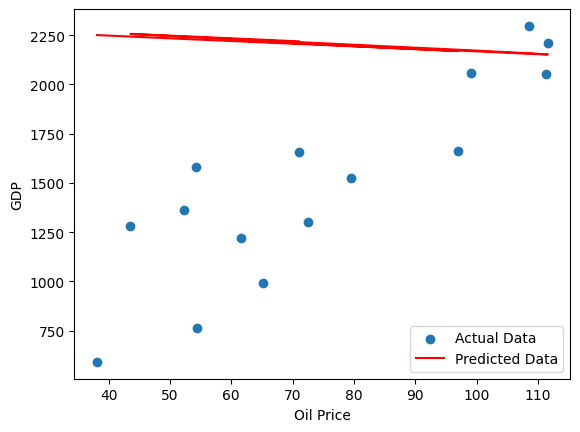

In [33]:
plt.scatter(df.oilprice, df.gdp, label='Actual Data')
plt.plot(df.oilprice, df["new"], color='red', label='Predicted Data')
plt.xlabel('Oil Price')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [34]:
model.predict(np.array([[2025, 100]]))[:, 0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([2184.5208], dtype=float32)